# Propagation of imprecise probabilities resulting from small data

Author: Dimitris G. Giovanis,
Date: July 16, 2018

Based on the work:

[1] J. Zhang, M. D. Shields, On the quantification and propagation of imprecise probabilities
resulting from small datasets, Mechanical Systems and Signal Processing, 98, (2018), 465-483.

This example runs the recently developed Bayesian and information theoretic method to quantify uncertainties in both model form and model parameters associated with small datasets. This approach uses probabilistic families of distributions that can be easily propagated through a computational model using MCMC simulations with importance
sampling reweighting.

In [1]:
from UQpy.Inference import BayesIS
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

Assuming that we have a very smal dataset:

In [2]:
data = np.array([0.25023453,  2.3426804,   3.1530358,   1.74756396,  2.98132079,  2.51421884,
                 2.22117967,  0.92995667,  1.81050417,  2.25500144])

Show the histogram of initial small data

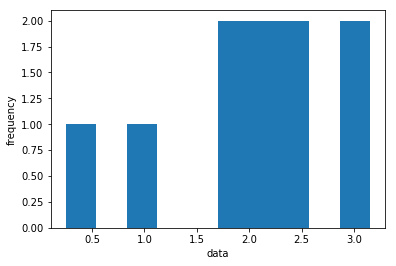

In [3]:
plt.figure()
plt.hist(data)
plt.xlabel('data')
plt.ylabel('frequency')
plt.show()

Run the Bayesian Importance Sampling method. You need to provide: 1) a list with names of candiate probability models, 2) Parameters to run MCMC method (look the example MCMC), 3) the max_delta parameter which defines the threshold for selecting the most suitable models among the candidate models

In [4]:
candidate_models = ['normal', 'lognormal']

x = BayesIS(data=data, candidate_model=candidate_models,
            pdf_proposal_type='Uniform', pdf_proposal_scale=[1], nsamples_mcmc=10000, algorithm='Stretch', jump=100,
            walkers=50, model_type='python', max_delta=8, nsamples_mixt=1000)

Running Bayesian Inference...
Running Informative model selection... normal
Running Informative model selection... lognormal
Successful execution of the code!


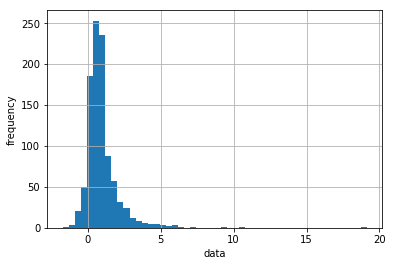

In [5]:
# print and plot the samples
plt.figure()
plt.hist(x.samples_mixture, bins=50)
plt.grid(True)
plt.xlabel('data')
plt.ylabel('frequency')
plt.show()

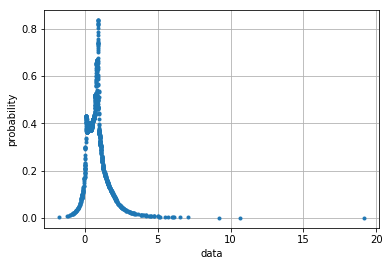

In [6]:
# print and plot the optimal sampling density
plt.figure()
plt.plot(x.samples_mixture, x.optimal_pdf, '.')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('PDF')
plt.show()


Propagate the uncertainty for a plate buckling strength problem (close-form) as presented in [1]:

$b_1 = 35.712$,
$b_2 = 0.7875$,
$b_3 = 34 + x$,
$b_4 = 28637.5$,
$b_5 = 0.35$,
$b_6 = 5.25$,


$ F(x) = \bigg(2.1\sqrt{\frac{b_1^2 \cdot b_3}{b_2^2\cdot b_4}} -\frac{0.9b_2^2 \cdot b_4^2 }{b_1^2\cdot b_3}\bigg)\times\bigg(1-\frac{0.75\cdot b_5}{\sqrt{\frac{b_1^2 \cdot b_3}{b_2^2\cdot b_4}}}\times(1-2\times b_6\cdot \frac{b_2}{b_1})\bigg) $


In [7]:
from UQpy.RunModel import RunModel

gfun = RunModel(cpu=1, model_type='python', model_script='pfn_inference.py', dimension=1,
                samples=x.samples_mixture)


Evaluating the model...



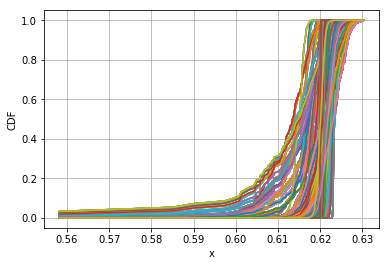

In [13]:
# sort the objective function for plotting
index = np.argsort(gfun.model_eval.QOI)
sort_f = np.sort(gfun.model_eval.QOI)
plt.figure()
# Reweight the samples according to the importance weights
for i in range(x.is_weights.shape[0]):
    ss = np.sum(x.is_weights[:, i])
    ww = x.is_weights[:, i]/ss
    xw = ww[index]
    yw = np.cumsum(xw)
    plt.plot(sort_f, yw) # plot the empirical CDFs in the for loop

plt.grid(True)
plt.xlabel('x')
plt.ylabel('CDF')
plt.show()

